In [20]:
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import api_keys

import time
import warnings

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from textblob import TextBlob

In [21]:
consumer_key = "CUo3CJe447p7tL5OMA3JSFMMm"
consumer_secret = "spg0hmHWDiCwgD9AkhKYlOYBZQzm15gx93A5pQpVAHhKGItEoe"
access_token = "1037354150801993728-R3eYInyHAOEWz4o34RNhDSIljFst6D"
access_token_secret = "jug1VzSh8bddoFOWO9iqFT96ev1FbvqA3R1n00gAjpHor"

In [22]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

news_accounts = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

In [23]:
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

for x in range(5):

    for account in news_accounts:
        tweets = api.user_timeline(account, page=x)

        for tweet in tweets:
            
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])

            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [24]:
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

file_name = str(time.strftime("%m-%d-%y")) + "_tweets_sentiments_fig.csv"
tweet_df.to_csv("analysis/" + file_name, encoding="utf-8")

tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,BREAKING: Federal appeals court rules against ...,Thu Nov 08 19:18:44 +0000 2018,0.0000,0.000,1.000,0.000
1,Fox News,Breaking News: Grand jury indicts captain of M...,Thu Nov 08 17:02:25 +0000 2018,-0.6124,0.115,0.615,0.269
2,Fox News,JUST IN: Police identify gunman who opened fir...,Thu Nov 08 15:14:45 +0000 2018,-0.7783,0.000,0.638,0.362
3,Fox News,JUST IN: Supreme Court Justice Ruth Bader Gins...,Thu Nov 08 14:22:51 +0000 2018,0.7906,0.389,0.611,0.000
4,Fox News,Sgt. Ron Helus was fatally shot when he respon...,Thu Nov 08 13:43:25 +0000 2018,-0.6369,0.000,0.833,0.167


In [25]:
tweet_df["tweet_date"] = pd.to_datetime(tweet_df["tweet_date"])

tweet_df.sort_values("tweet_date", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,McDonald's customers’ $5M lawsuit over unwante...,2018-11-08 03:01:47,-0.4215,0.000,0.743,0.257
1,Fox News,Woman finds her diamond before proposal and 'r...,2018-11-08 03:04:00,-0.0772,0.170,0.638,0.191
2,Fox News,.@senatemajldr Mitch McConnell said Wednesday ...,2018-11-08 03:11:00,0.4939,0.158,0.842,0.000
3,Fox News,Surveillance video shows Michigan woman report...,2018-11-08 03:16:01,0.0000,0.000,1.000,0.000
4,Fox News,"Democrat Colin Allred, who unseated Rep. Pete ...",2018-11-08 03:23:00,0.0000,0.000,1.000,0.000


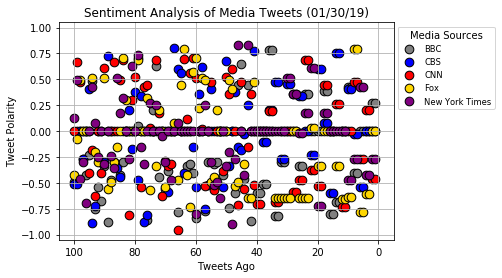

In [52]:
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="grey", s=75, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="blue", s=75, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="purple", s=75, label="New York Times")

plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

file_name = str(time.strftime("%m-%d-%y")) + "_sentiments_scatter_fig.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

plt.show()

In [53]:
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

In [54]:
pd.DataFrame(tweet_df_polarity)

,tweet_vader_score
tweet_source,
BBC News (World),-0.166426
CBS News,-0.005757
CNN,-0.017313
Fox News,-0.116200
The New York Times,-0.029325


C:\Anaconda\envs\PythonData\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


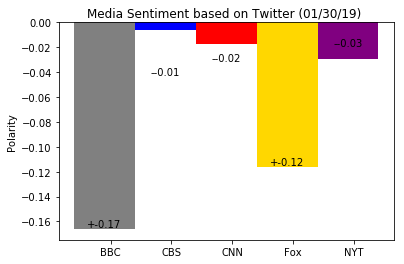

In [55]:
tweets_polarity = (tweet_df_polarity["BBC News (World)"], tweet_df_polarity["CBS News"], tweet_df_polarity["CNN"], tweet_df_polarity["Fox News"], tweet_df_polarity["The New York Times"])

fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="grey")
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="blue")
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="red")
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color='gold')
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color='purple')

def autolabelpos(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height, '+%.2f' % float(height), ha='center', va='bottom')

def autolabelneg(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.05, '-%.2f' % float(height), ha='center', va='bottom')
    
autolabelpos(rect1)
autolabelneg(rect2)
autolabelneg(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

ax.set_ylabel("Polarity")
ax.set_title("Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind + 0.1)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.set_autoscaley_on(True)
ax.grid(False)

file_name = str(time.strftime("%m-%d-%y")) + "_sentiments_bar_fig.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')
fig.show()